In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv('/home/abhishek/Desktop/machine-learning/datasets/mnist-in-csv/mnist_train.csv')
print(df.shape)

(60000, 785)


In [70]:
print(df.columns)
##It has reshaped a 28*28 image into a row.

Index([u'label', u'1x1', u'1x2', u'1x3', u'1x4', u'1x5', u'1x6', u'1x7',
       u'1x8', u'1x9',
       ...
       u'28x19', u'28x20', u'28x21', u'28x22', u'28x23', u'28x24', u'28x25',
       u'28x26', u'28x27', u'28x28'],
      dtype='object', length=785)


In [71]:
df.head(n=5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
data = df.values
print(data.shape)
print(type(data))



(60000, 785)
<type 'numpy.ndarray'>


In [73]:
Y = data[:,0]
X = data[:,1:]
print(X.shape,Y.shape)

((60000, 784), (60000,))


In [74]:
##now we split 80% data into test data and rest 20% goes into the training dataset.
split = int(0.8*X.shape[0])
print(split)

X_train = X[:split,:]
Y_train = Y[:split]
X_test = X[split:,:]
Y_test = Y[split:]

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

48000
((48000, 784), (48000,))
((12000, 784), (12000,))


In [75]:
##now we will apply the knn algorithm to get our desired results.
#last time in normal knn we had a 2d point. but here an image has 784 dimension. 
##so the distance that we will find will be on a 784 dimensional image.

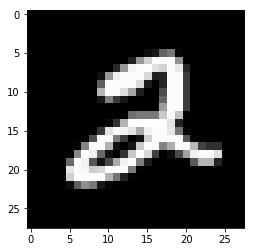

In [76]:
def drawImg(sample):
    img = sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()
drawImg(X_train[5])

In [80]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,queryPoint,k=5):
    
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i]))
        
    
    vals = sorted(vals)
    # Nearest/First K points
    vals = vals[:k]
    
    vals = np.array(vals)
    
    #print(vals)
    
    new_vals = np.unique(vals[:,1],return_counts=True)
    #print(new_vals)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred

In [84]:
##MAKING PREDICTION2
pred = knn(X_train,Y_train,X_test[2])

print(int(pred))

8


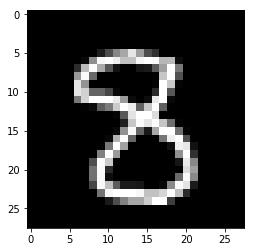

8


In [83]:
drawImg(X_test[2])
print(Y_test[2])